# Notebook to perform training procedure as described in "*Multispecies detection and identification of African mammals in aerial imagery using CNN*"


---
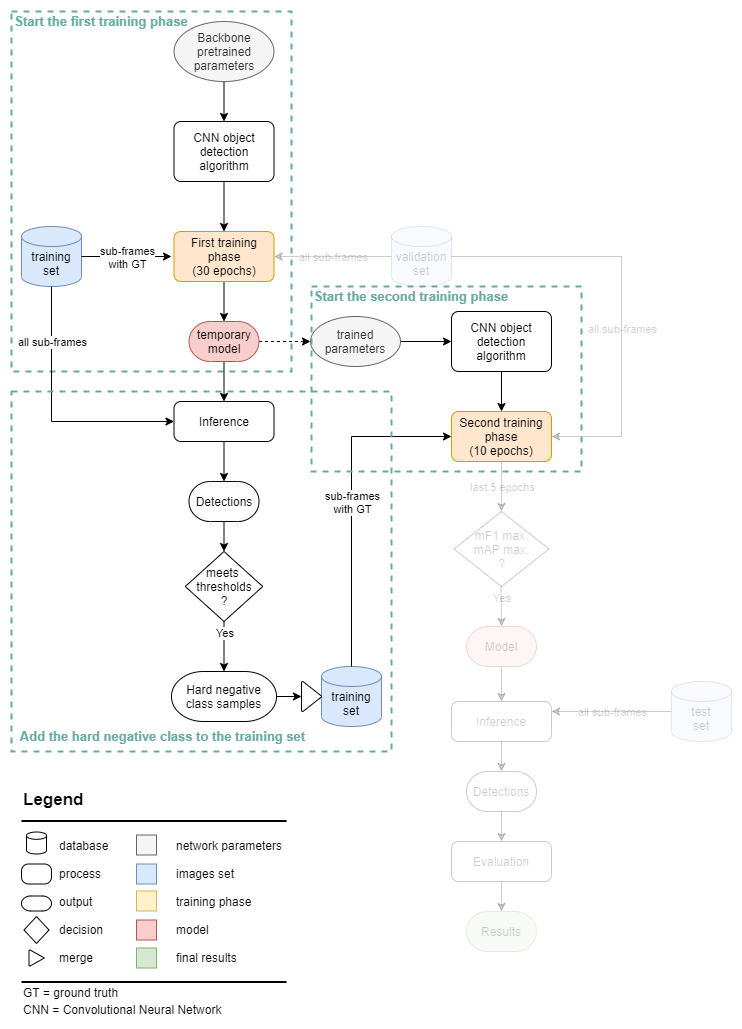



# GPU
You must need a GPU of 16GB with sub-frames of 2,000x2,000 pixels !

In [ ]:
import torch 

# GPU
t = torch.cuda.get_device_properties(0).total_memory
t_GB = t/float((1024**3))
name = torch.cuda.get_device_name()
print('[GPU] Name : {:s} | Memory : {:.2f} GB'.format(name,t_GB))

# Mount to your Drive
Note that annotations and images must be in your drive.

In [ ]:
# Connection to Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Installations
You first need to import the mmdetection folder into your drive.
At the end of the installations, you will need to restart runtime, just click on the suggested button. Then, go the next section and run the cells.


In [ ]:
!git clone https://github.com/sfoucher/Masterclass-Biodiversity -b code-reorg

In [ ]:
# MMDetection directory (local)

mmdetection_dir = '/content/Masterclass-Biodiversity/code/adapted_mmdetection/mmdetection-1.0.0'

print("MMdetection path : {}".format(mmdetection_dir))

In [ ]:
!pip install --quiet -U torch==1.4.0+cu92 torchvision==0.5.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
import os
from os.path import exists, join, basename, splitext
import shutil
import sys
import torch



# Installations of dependencies
#!pip install parse terminaltables
#!pip install torch==1.4.0 torchvision==0.5.0 -f https://openmmlab.oss-accelerate.aliyuncs.com/mmcv/dist/index.html
#!pip install --quiet -U torch==1.4.0+cu101 torchvision==0.5.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -qU mmcv==0.6.0 -f https://openmmlab.oss-accelerate.aliyuncs.com/mmcv/dist/index.html
!pip install parse terminaltables

# Installation of MMDetection
#!cd {mmdetection_dir} && python setup.py install
!pip install -r "{mmdetection_dir}/requirements.txt"

# Path to system
sys.path.append(mmdetection_dir)

We can check the environment:

In [ ]:
!python {mmdetection_dir}/mmdet/utils/collect_env.py

## Download the Training Set

In [14]:
!gdown --id 1xx9BAvC_-8DgROSELUqty_QK_ch4DSd9 


Downloading...
From: https://drive.google.com/uc?id=1xx9BAvC_-8DgROSELUqty_QK_ch4DSd9
To: /content/general_dataset.zip
100% 13.2G/13.2G [02:11<00:00, 99.8MB/s]


In [16]:
!unzip /content/general_dataset.zip

Archive:  /content/general_dataset.zip
   creating: general_dataset/
   creating: general_dataset/train_subframes/
  inflating: general_dataset/train_subframes/1172e9a87937acd523f1f6c05cb4ca2f49cf2581_S4.JPG  
  inflating: general_dataset/train_subframes/1172e9a87937acd523f1f6c05cb4ca2f49cf2581_S3.JPG  
  inflating: general_dataset/train_subframes/1172e9a87937acd523f1f6c05cb4ca2f49cf2581_S0.JPG  
  inflating: general_dataset/train_subframes/1172e9a87937acd523f1f6c05cb4ca2f49cf2581_S1.JPG  
  inflating: general_dataset/train_subframes/1224218a4e4a3a34ecbed90e761fd67a7143292a_S4.JPG  
  inflating: general_dataset/train_subframes/2370db93306d5c3b8a453bcf343c77f858fe5b87_S3.JPG  
  inflating: general_dataset/train_subframes/1685b081238152ad375153fff3de2b6751d460c6_S4.JPG  
  inflating: general_dataset/train_subframes/27d70f47803252ee30bb07e1f61d3f6ed5b9e04f_S0.JPG  
  inflating: general_dataset/train_subframes/2370db93306d5c3b8a453bcf343c77f858fe5b87_S4.JPG  
  inflating: general_dataset/t

# Fill with your paths

In [22]:
# Images
images_folder = '/content/general_dataset/train/' # path to your training images folder

# Annotations
original_size_annos = '/content/general_dataset/groundtruth/json/big_size/train_big_size_A_B_E_K_WH_WB.json' # path to your original size training images annotations (.json) 
!mkdir /content/output
# Models
models = {
    'faster_rcnn' : {
        'config' : '< path to the config file >',
        'out' : '< path to your outputs folder >'
    },
    'libra_rcnn' : {
        'config' : '/content/Masterclass-Biodiversity/code/adapted_mmdetection/configs/libra_rcnn/libra_faster_rcnn_r101_fpn_1x.py', #< path to the config file >
        'out' : '/content/output'
    },
    'retinanet' : {
        'config' : '< path to the config file >',
        'out' : '< path to your outputs folder >'
    }
}

seed = '516'

mkdir: cannot create directory ‘/content/output’: File exists


# Select your algorithm to train

In [19]:
# Which model ?
# ---
model_name = 'libra_rcnn'
# ---

# Start the first training phase

In [23]:
# Develop MMDetection
#mmdetection_dir = '/content/drive/My Drive/mmdetection'
%cd {mmdetection_dir}
#!python setup.py develop
#!pip install -e {mmdetection_dir}

# Training
config_file = models[model_name]['config']
wd = models[model_name]['out'] 

!python tools/train.py $config_file \
--work_dir $wd \
--deterministic \
--seed $seed

/content/Masterclass-Biodiversity/code/adapted_mmdetection/mmdetection-1.0.0
/usr/local/lib/python3.7/dist-packages/mmcv/utils/registry.py:64: UserWarning: The old API of register_module(module, force=False) is deprecated and will be removed, please use the new API register_module(name=None, force=False, module=None) instead.
  'The old API of register_module(module, force=False) '
2021-11-10 21:49:51,445 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.12 (default, Sep 10 2021, 00:21:48) [GCC 7.5.0]
CUDA available: True
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.1.TC455_06.29190527_0
GPU 0: Tesla P100-PCIE-16GB
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.4.0+cu92
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d6

# Add the negative class to the training set

## Useful functions

In [ ]:
import os
from PIL import Image
from albumentations import Compose, BboxParams, Crop
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import numpy as np
import torch
import torchvision
from torch.utils.data import Dataset
import json
import time
import datetime
from datetime import date
import csv
from os.path import exists, join, basename, splitext
from mmdet.apis import inference_detector, init_detector
import collections
import pandas as pd
import shutil

class Subframes(object):
    ''' 
    Class allowing the visualisation and the cropping of a labeled 
    image (bbox) into sub-frames whose dimensions are specified 
    by the user.

    Attributes
    -----------
    img_name : str
        name of the image (with extension, e.g. "My_image.JPG").
    image : PIL
        PIL image.
    target : dict
        Must have 'boxes' and 'labels' keys at least.
        'boxes' must be a list in the 'coco' bounding box format :
        [[xmin, ymin, width, height], ...]
    width : int
        width of the sub-frames
    height : int
        height of the sub-frames
    strict : bool
        set to True get sub-frames of exact same size 
        (e.g width x height) (default: False)
    
    Methods
    --------
    getlist(overlap=False)
        Produces a results list containing, for each row :
        the sub-frame (3D list, dtype=uint8), the bboxes (2D list),
        the labels (1D list) and the filename (str).
    visualise(results)
        Displays ordered sub-frames of the entire image.
    topoints(results)
        Converts the bounding boxes into points annotations.
    displayobjects(results, points_results, ann_type='point')
        Displays only sub-frames containing objects.
    save(results, output_path, object_only=True)
        Saves sub-frames to a specific path.
    '''

    def __init__(self, img_name, image, target, width, height, strict=False):
        '''
        Parameters
        -----------
        img_name : str
            name of the image (with extension, e.g. "My_image.JPG")
        image : PIL
            PIL image
        target : dict
            Must have 'boxes' and 'labels' keys at least.
        width : int
            width of the sub-frames
        height : int
            height of the sub-frames
        strict : bool
            set to True get sub-frames of exact same size 
            (e.g width x height) (default: False)
        '''

        self.img_name = img_name
        self.image = image
        self.target = target
        self.width = width
        self.height = height
        self.strict = strict

        self.img_width = image.size[0]
        self.img_height = image.size[1]

        self.x_sub = 1 + int((self.img_width - (self.img_width % width)) / width)
        self.y_sub = 1 + int((self.img_height - (self.img_height % height)) / height)

    def getlist(self, overlap=False):
        '''
        Produces a results list containing, for each row :
        the sub-frame (3D list, dtype=uint8), the bboxes (2D list),
        the labels (1D list) and the filename (str).
        Parameters
        -----------
        overlap : bool, optional
            Set to True to get an overlap of 50% between 
            2 sub-frames (default: False)
        Returns
        --------
        list
        '''
        height = self.height
        width = self.width
        img_height = self.img_height
        img_width = self.img_width

        results = []

        # Image preprocessing      
        image_np = np.array(self.image)
        boxes = self.target['boxes']
        labels = self.target['labels']
        annotations = {'image':image_np,'bboxes':boxes,'labels':labels}

        # Crop lists
        if overlap is True:
            overlap = 0.5
            y_sub = int(np.round(height*overlap))
            x_sub = int(np.round(width*overlap))
            rg_ymax = img_height-y_sub
            rg_xmax = img_width-x_sub
        else:
            y_sub = height
            x_sub = width
            rg_ymax = img_height
            rg_xmax = img_width

        crops = []

        for y in range(0, rg_ymax, y_sub):
            if  y+height <= img_height:
                for x in range(0, rg_xmax, x_sub):
                    if  x+width <= img_width:
                        xmin, ymin = x, y
                        xmax, ymax = x+width, y+height
                    elif x+img_width%width <= img_width:
                        xmin, ymin = img_width - width, y
                        xmax, ymax = x+img_width%width, y+height

                    if self.strict is True:
                        crops.append([xmin, ymin, xmax, ymax])
                    else:
                        crops.append([x, y, xmax, ymax])
            
            elif  y+img_height%height <= img_height:
                for x in range(0, rg_xmax, x_sub):
                    if  x+width <= img_width:
                        xmin, ymin = x, img_height - height
                        xmax, ymax = x+width, y+img_height%height
                    elif x+img_width%width <= img_width:
                        xmin, ymin = img_width - width, img_height - height
                        xmax, ymax = x+img_width%width, y+img_height%height

                    if self.strict is True:
                        crops.append([xmin, ymin, xmax, ymax])
                    else:
                        crops.append([x, y, xmax, ymax])

        sub = 0
        for xmin, ymin, xmax, ymax in crops:
            transf = Compose([Crop(xmin, ymin, xmax, ymax, p=1.0)], 
                                bbox_params=BboxParams(format='coco',
                                                        min_visibility=0.25, 
                                                        label_fields=['labels']))
            augmented  = transf(**annotations)
            sub_name = self.img_name.rsplit('.')[0] + "_S" + str(sub) + ".JPG"
            results.append([augmented['image'],augmented['bboxes'],augmented['labels'],sub_name])
            sub += 1

        return results

    def visualise(self, results):
        '''
        Displays ordered sub-frames of the entire image.
        Parameters
        -----------
        results : list
            The list obtained by the method getlist().
        Returns
        --------
        matplotlib plot
        '''

        if len(results) > (self.x_sub*self.y_sub):
            x_sub = 2*self.x_sub - 2
            y_sub = 2*self.y_sub - 2
        else:
            x_sub = self.x_sub
            y_sub = self.y_sub

        plt.figure(1)
        plt.suptitle(self.img_name)
        sub = 1
        for line in range(len(results)):

            if self.img_width % self.width != 0:
                n_col = x_sub
                n_row = y_sub
            else:
                n_col = x_sub - 1
                n_row = y_sub - 1

            plt.subplot(n_row, n_col, sub, xlim=(0,self.width), ylim=(self.height,0))
            plt.imshow(Image.fromarray(results[line][0]))
            plt.axis('off')
            plt.subplots_adjust(wspace=0.1,hspace=0.1)

            text_x = np.shape(results[line][0])[1]
            text_y = np.shape(results[line][0])[0]

            if self.width > self.height:
                f = self.height*(self.y_sub/y_sub)
            else:
                f = self.width*(self.x_sub/x_sub)

            plt.text(0.5*text_x, 0.5*text_y, 
                    "S"+str(line),
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=0.02*f,
                    color='w')
            sub += 1

    def topoints(self, results):
        '''
        Converts the bounding boxes into points annotations.
        Parameters
        -----------
        results : list
            The list obtained by the method getlist().
        Returns
        --------
        list
            A 2D list with headers : "id", "filename", "count",
            "locations" where
            - "id" represents the unique id of the sub-frame within 
              the image
            - "filename" is the name of the sub-frame 
              (e.g. "My_image_S1.JPG")
            - "count" is the number of objects into the sub-frame
            - "points" is a list of tuple representing the 
              locations of the objects (y,x)
    
        '''

        points_results = [['id','filename','count','locations']]
        loc = []
        for line in range(len(results)):
            # Verify that bbox exists
            if results[line][1]:
                count = len(results[line][1])
                for bbox in range(len(results[line][1])):
                    boxe = results[line][1][bbox]
                    x = int(boxe[0]+(boxe[2])/2)
                    y = int(boxe[1]+(boxe[3])/2)
                    point = (y,x)
                    loc.append(point)
            
                sub_name = self.img_name.rsplit('.')[0] + "_S" + str(line) + ".JPG"
                points_results.append([line, sub_name, count, loc])
                loc = []

        return points_results

    def displayobjects(self, results, points_results, ann_type='point'):
        '''
        Displays only sub-frames containing objects.
        Parameters
        -----------
        results : list
            The list obtained by the method getlist().
        points_results : list
            The list obtained by the method topoints(results).
        ann_type : str, optional
            A string used to specify the annotation type. Choose
            between :
            - 'point' to visualise points
            - 'bbox' to visualise bounding boxes
            - 'both' to visualise both
            (default is 'point')
        Returns
        --------
        matplotlib plot
        '''

        sub_r = 0
        sub_c = 0

        n_row = int(np.round(math.sqrt(len(points_results)-1)))
        n_col = n_row

        if int(len(points_results)-1) > int(n_row*n_col):
            n_row += 1

        fig, ax = plt.subplots(nrows=n_row, ncols=n_col, squeeze=False)

        for r in range(n_row):
            for c in range(n_col):
                ax[r,c].axis('off')
                plt.subplots_adjust(wspace=0.1,hspace=0.1)

        for o in range(1,len(points_results)):

            id_object = points_results[o][0]
            patch_object = results[id_object][0]

            text_x = np.shape(results[id_object][0])[1]
            text_y = np.shape(results[id_object][0])[0]

            # Plot
            ax[sub_r,sub_c].imshow(Image.fromarray(patch_object))
            ax[sub_r,sub_c].text(0.5*text_x, 0.5*text_y, 
                    "S"+str(id_object),
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=15,
                    color='w',
                    alpha=0.6)

            if ann_type == 'point':
                points = points_results[o][3]
                for p in range(len(points)):
                    ax[sub_r,sub_c].scatter(points[p][1],points[p][0], color='r')
            
            elif ann_type == 'bbox':
                bboxes = results[id_object][1]
                for b in range(len(bboxes)):
                    rect = patches.Rectangle((bboxes[b][0],bboxes[b][1]),bboxes[b][2],bboxes[b][3], linewidth=1, edgecolor='r', facecolor='none')
                    ax[sub_r,sub_c].add_patch(rect)
                
            elif ann_type == 'both':
                points = points_results[o][3]
                bboxes = results[id_object][1]
                for b in range(len(bboxes)):
                    ax[sub_r,sub_c].scatter(points[b][1],points[b][0], color='b')
                    rect = patches.Rectangle((bboxes[b][0],bboxes[b][1]),bboxes[b][2],bboxes[b][3], linewidth=1, edgecolor='r', facecolor='none')
                    ax[sub_r,sub_c].add_patch(rect)

            else:
                raise ValueError('Annotation of type \'{}\' unsupported. Choose between \'point\',\'bbox\' or \'both\'.'.format(ann_type))
                
            if sub_c < n_col-1:
                sub_r = sub_r
                sub_c += 1
            else:
                sub_c = 0
                sub_r += 1
            
    def save(self, results, output_path, object_only=True):
        '''
        Saves sub-frames (.JPG) to a specific path.
        Parameters
        -----------
        results : list
            The list obtained by the method getlist().
        output_path : str
            The path to the folder chosen to save sub-frames.
        object_only : bool, optional
            A flag used to choose between :
            - saving all the sub-frames of the entire image
              (set to False)
            - saving only sub-frames with objects
              (set to True, default)
        Returns
        --------
        None
        '''

        for line in range(len(results)):
            if object_only is True:
                if results[line][1]:
                    subframe = Image.fromarray(results[line][0])
                    sub_name =  results[line][3]
                    subframe.save(os.path.join(output_path, sub_name))
                    
            elif object_only is not True:
                subframe = Image.fromarray(results[line][0])
                sub_name =  results[line][3]
                subframe.save(os.path.join(output_path, sub_name))

def softnms(preds, Nt, tresh, method='linear', sigma=0.5):
    '''
    Function for applying the Non-Maximum Suppression 
    (NMS) filter and Soft-NMS.

    Parameters
    ----------
    preds : dict
        Contains, at least, 3 keys:
          - 'boxes' : list, containing a list of 
            predicted bounding boxes,
          - 'labels' : int, containing a list of labels
            associated to the bboxes,
          - 'scores' : float, containing confidence 
            scores associated to predictions.
    
    Nt : float
        IoU treshold to apply.

    tresh : float
        Scores treshold.
    
    method : str, optional
        Choose between:
          - 'nms' for classical non-soft NMS
          - 'linear' for linear Soft-NMS
          - 'gaussian' for gaussian Soft-NMS

        In this third case, it is possible to
        specify the variance, by changing 'sigma'.

        Default: 'linear'
    
    sigma : float, optional
        Variance of gaussian's curve.

        Default: 0.5


    Returns
    -------
    dict
        Contains the 3 initial keys including filtered
        values.

    Notes
    -----
    Based on:
      - https://github.com/DocF/Soft-NMS/blob/master/soft_nms.py
      - https://github.com/bharatsingh430/soft-nms/blob/master/lib/nms/cpu_nms.pyx

    '''

    boxes = np.array(preds['boxes'])
    labels = np.array(preds['labels'])
    scores = np.array(preds['scores'])

    boxes_f = boxes.copy()
    labels_f = labels.copy()
    scores_f = scores.copy()

    if len(boxes)==0:
        return []

    if boxes.dtype.kind == "i":
		    boxes = boxes.astype("float")

    N = boxes.shape[0]
    ind = np.array([np.arange(N)])
    boxes = np.concatenate((boxes, ind.T), axis=1)

    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]

    areas = (x2 - x1 + 1) * (y2 - y1 + 1)

    for i in range(N):

        # temporary variables
        t_boxes = boxes[i, :].copy()
        t_score = scores[i].copy()
        t_area = areas[i].copy()
        pos = i + 1

        if i != N-1:
            max_score = np.max(scores[pos:], axis=0)
            max_pos = np.argmax(scores[pos:], axis=0)

        else:
            max_score = scores[-1]
            max_pos = 0

        if t_score < max_score:
            boxes[i, :] = boxes[max_pos + i + 1, :]
            boxes[max_pos + i + 1, :] = t_boxes
            t_boxes = boxes[i,:]

            scores[i] = scores[max_pos + i + 1]
            scores[max_pos + i + 1] = t_score
            t_score = scores[i]

            areas[i] = areas[max_pos + i + 1]
            areas[max_pos + i + 1] = t_area
            t_area = areas[i]

        # compute IoU
        xx1 = np.maximum(boxes[i, 0], boxes[pos:, 0])
        yy1 = np.maximum(boxes[i, 1], boxes[pos:, 1])
        xx2 = np.minimum(boxes[i, 2], boxes[pos:, 2])
        yy2 = np.minimum(boxes[i, 3], boxes[pos:, 3])


        w = np.maximum(0.0, xx2 - xx1 + 1)
        h = np.maximum(0.0, yy2 - yy1 + 1)

        # IoU
        iou = (w * h) / (areas[i] + areas[pos:] - (w * h))

        # Weigthing
        # ---
        # 1 - Linear
        if method == 'linear':
            weight = np.ones(iou.shape)
            weight[iou > Nt] = weight[iou > Nt] - iou[iou > Nt]
        # 2 - Gaussian
        elif method == 'gaussian':
            weight = np.exp(-(iou*iou)/sigma)
        # 3 - Original
        elif method == 'nms':
            weight = np.ones(iou.shape)
            weight[iou > Nt] = 0

        scores[pos:] = weight * scores[pos:]
  
    idx = boxes[:,4][scores > tresh]
    pick = idx.astype(int)

    return {'boxes':boxes_f[pick],'labels':labels_f[pick],'scores':scores_f[pick]}

def overlap_merging(img_path, coco_path, width, height, output_path, 
                    mmdet_model, nms_method='nms', IoU=0.3, sc_tresh=0.5):
    '''
    Function to perform inference and stitching of the 
    resulting predictions on a big-sized image cut into 
    sub-frames with 50% overlap, in order to obtain the 
    original image and its predictions.

    To be used with the Subframes class.

    Parameters
    ----------
    img_path : str
        Path to the image.

    coco_path : str
        Path to the COCO-annotation type (JSON).
    
    width : int
        Width of the sub-frames.

    height : int
        Height of the sub-frames.
    
    output_path : str
        Sub-frames saving path.
    
    mmdet_model : object
        Model built from mmdet.apis.init_detector

    nms_method : str, optional
        NMS method to apply to bounding boxes.
        Choose between:
            - 'nms' : for classic NMS
            - 'linear' : for linear soft-NMS
            - 'gaussian' : for gaussian soft-NMS (sigma=0.5)
        Default : 'nms'

    IoU : float, optional
        (Soft-)NMS treshold.
        Default : 0.3
    
    sc_tresh : float, optional
        Scores treshold to applay on predictions.
        Default : 0.5

    Returns
    -------
    dict
        Resulting predictions containing 3 keys:
          - 'boxes' (2D array)
          - 'labels' (1D array)
          - 'scores' (1D array)
    '''

    t_i = time.time()

    with open(coco_path,'r') as json_file:
        coco_dic = json.load(json_file)

    cls_names = []
    for cls in coco_dic['categories']:
        cls_names.append(cls['name'])

    # PIL image
    pil_img = Image.open(img_path)

    # Infos
    name = basename(img_path)

    w_sub = int(pil_img.width/width)
    h_sub = int(pil_img.height/height)

    if pil_img.width % width != 0:
        w_sub += 1
    if pil_img.height % height != 0:
        h_sub += 1


    # Export folder
    save_path = os.path.join(output_path,name)
    if os.path.exists(save_path) is not True:
        os.mkdir(save_path)

    # Get annos
    for image in coco_dic['images']:
        if image['file_name'] == name:
            img_id = image['id']

    boxes = []
    labels = []
    for ann in coco_dic['annotations']:
        if ann['image_id'] == img_id:
            boxes.append(ann['bbox'])
            labels.append(ann['category_id'])

    gt = {'boxes':boxes, 'labels':labels}

    # Subframes class instantiation
    sub_img = Subframes(name, pil_img, gt, width, height)

    # overlap
    results = sub_img.getlist(overlap=True)

    sub_img.save(results, save_path, object_only=False)

    os.chdir(save_path)
    files = os.listdir(save_path)
    files.sort(key=os.path.getctime)

    files_2D = np.reshape(np.array(files), (2*h_sub-1,2*w_sub-1))

    # Initializations
    w_offset = 0
    h_offset = 0
    global_boxes = []
    global_labels = []
    global_scores = []

    for y in range(files_2D.shape[0]):
        for x in range(files_2D.shape[1]):

            # Image
            image = files_2D[y,x]

            # Predictions
            predictions = inference_detector(mmdet_model, image)

            # adapt
            boxes = []
            labels = []
            scores = []
            for n_class in range(len(cls_names)):
                for n_box in range(len(predictions[n_class])):
                    box = list(predictions[n_class][n_box][:4])
                    score = predictions[n_class][n_box][4]
                    boxes.append(box)
                    labels.append(n_class+1)
                    scores.append(score)

            predictions = {'boxes': boxes, 'labels': labels, 'scores': scores}

            # Put into a global frame
            i = 0
            for box in predictions['boxes']:

                new_box = [box[0] + w_offset,
                          box[1] + h_offset,
                          box[2] + w_offset,
                          box[3] + h_offset]            
                
                global_boxes.append(new_box)
                global_labels.append(predictions['labels'][i])
                global_scores.append(predictions['scores'][i])

                i += 1

            w_offset += 0.5*width

        w_offset = 0
        h_offset += 0.5*height

    global_preds = {
        'boxes':global_boxes, 
        'labels':global_labels,
        'scores':global_scores
        }

    # Soft-NMS 
    global_preds = softnms(global_preds, IoU, sc_tresh, method=nms_method)

    t_f = time.time()

    shutil.rmtree(save_path)

    return global_preds

def compute_IoU(box_A, box_B):
    '''
    Function to compute Intersect-over-Union (IoU)
    between two lists of boxes.

    Arguments
    ---------
    box_A : list
        (dim=4) 2 points-style (upper-left (x1,y1) and 
        bottom-right (x2,y2))
    box_B : list
        (dim=4) 2 points-style (upper-left (x1,y1) and 
        bottom-right (x2,y2))
    
    Returns
    -------
    IoU : float
    '''

    xA = max(box_A[0],box_B[0])	
    yA = max(box_A[1],box_B[1])	
    xB = min(box_A[2],box_B[2])	
    yB = min(box_A[3],box_B[3])	

    area = max(0, xB - xA +1) * max(0, yB - yA +1)	

    area_A = (box_A[2] - box_A[0] + 1) * (box_A[3] - box_A[1] + 1)	
    area_B = (box_B[2] - box_B[0] + 1) * (box_B[3] - box_B[1] + 1)	

    IoU = area / float(area_A + area_B - area)	

    return IoU
    
def match(predictions, img_name, coco_path, IoU_tresh, with_scores=False):	
    '''	
    Function used to match the ground-truth bounding boxes 	
    to predicted ones. The outputs are used to construct a	
    confusion matrix.	

    Parameters	
    ----------	
    predictions : pd.DataFrame
        Pandas DataFrame with header :
        |'Image'|'x1'|'y1'|'x2'|'y2'|'Label'|'Score'|

    img_name : str	
        Image's name.	

    coco_path : str	
        Path to the COCO-style annotation file in JSON format.

    IoU_tresh : float	
        IoU treshold.		

    with_scores : bool, optional
        If True, a column with scores is concatenated to matching.
        Default : False

    Returns	
    -------	
    2D list	
        Matching between gt and predicted bbox
    '''	

    # Open JSON file with ground truth	
    with open(coco_path,'r') as json_file:	
        coco_dic = json.load(json_file)	

    # Get images id and ground truth infos
    id_img = [
        i['id']
        for i in coco_dic['images']
        if i['file_name']==img_name][0]
    
    gt_boxes = [
        [
            a['bbox'][0],
            a['bbox'][1],
            a['bbox'][0]+a['bbox'][2],
            a['bbox'][1]+a['bbox'][3]
        ]
        for a in coco_dic['annotations']
        if a['image_id']==id_img
    ]

    gt_labels = [a['category_id'] for a in coco_dic['annotations']
                if a['image_id']==id_img]

    gt = {	
        'boxes': gt_boxes,	
        'labels': gt_labels	
    }	

    # Get predictions
    preds = {
            'boxes': [[p['x1'],p['y1'],p['x2'],p['y2']] for i,p in predictions.iterrows()],
            'labels': [p['Label'] for i,p in predictions.iterrows()],
            'scores': [p['Score'] for i,p in predictions.iterrows()],
            'indices': [i for i,p in predictions.iterrows()]
        }

    p_boxes = preds['boxes']

	
    res = []	
    i = 0	

    for gt_box, gt_label in zip(gt['boxes'], gt['labels']):	

        id_gt = i	
        p_iou = []	

        # No detection ? => FN	
        if len(p_boxes)==0:	
            res.append([i, gt_label, int(0), int(0), int(0), int(0), None])	
            continue	

        for p_box in preds['boxes']:	
            	
            IoU = compute_IoU(gt_box, p_box)

            p_iou.append(IoU)	

        # Maximum correspondance with gt
        p_iou_max = float(max(p_iou))	
        index = p_iou.index(p_iou_max)	

        # Iou to low ? FN	
        if p_iou_max < IoU_tresh and p_iou_max > 0:	
            p_label = int(0)
            p_score = preds['scores'][index]	
        elif p_iou_max == 0:	
            p_label = int(0)
            p_score = 0
        else:	
            p_label = int(preds['labels'][index])	
            p_score = preds['scores'][index]

        # Index of pandas.DataFrame
        pandas_idx = preds['indices'][index]

        res.append([id_gt, gt_label, index, p_label, p_iou_max, p_score, pandas_idx])

        # Avoid double count
        del preds['boxes'][index]
        del preds['labels'][index]
        del preds['scores'][index]
        del preds['indices'][index]

        i += 1	

    # p_boxes without correspondance = FPs	
    p_not_used = list(range(len(preds['boxes'])))

    for k in p_not_used:		
        label = int(preds['labels'][k])	
        score = preds['scores'][k]
        res.append([i, int(0), k, label, int(0), score, preds['indices'][k]])	
        i += 1	

    matching = np.array(res)

    if with_scores is True:
        matching = np.delete(matching, [0,2], 1)	# with IoU
        # matching = np.delete(matching, [0,2,4], 1)	# without
    else:
        matching = np.delete(matching, [0,2,5], 1)	 # with IoU
        # matching = np.delete(matching, [0,2,4,5], 1) # without

    return matching

## 0) Add the checkpoints paths to your paths

In [ ]:
models[model_name]['checkpoint'] = '< path to the last checkpoint .pth file (epoch 30) >'

## 1) Run the model on entire training images

In [ ]:
import pandas as pd
from mmdet.apis import init_detector
import time
import datetime
from datetime import date
import numpy as np
import os

# Initialize the model
model = init_detector(models[model_name]['config'], models[model_name]['checkpoint'])

# Initialize DataFrame
df = pd.DataFrame(columns=['Image','x1','y1','x2','y2','Label','Score'])

# Get images
images = os.listdir(images_folder)
if os.path.exists('/content/images_sub') is False:
    os.mkdir('/content/images_sub')

# Start inference on images
t_start = time.time()
for i,image in zip(range(len(images)),images):
    t_i = time.time()

    # Get predictions
    results = overlap_merging(
        img_path=os.path.join(images_folder,image),
        coco_path=original_size_annos,
        width=2000,
        height=2000,
        output_path='/content/images_sub',
        mmdet_model=model,
        IoU=0.5,
        sc_tresh=0.0
    )

    t_f = time.time()

    # Infos
    elapsed = str(datetime.timedelta(seconds=int(np.round(t_f-t_i))))
    print('Image [{}/{}] | Name : {} | Elapsed time : {}'
          .format(str(i+1), len(images), image, elapsed))

    if bool(results):
        for box , label , score in zip(results['boxes'],results['labels'],results['scores']):
            df = df.append(
                {'Image':image,
                'x1':box[0],
                'y1':box[1],
                'x2':box[2],
                'y2':box[3],
                'Label':label,
                'Score':score},
                ignore_index=True
            )
    # If no predictions, add a blank row
    else:
        df = df.append(
            {'Image':image,
            'x1':None,
            'y1':None,
            'x2':None,
            'y2':None,
            'Label':None,
            'Score':None}, 
            ignore_index = True
        )

# Export to CSV
outpath = os.path.join(models[model_name]['out'],f'{model_name}_{seed}_training_set_predictions.csv')
df.to_csv(outpath, index=False)

t_end = time.time()

# Print final infos
elapsed_total = str(datetime.timedelta(seconds=int(np.round(t_end-t_start))))
print('Total elapsed time : {}'.format(elapsed_total))

## 2) Get the hard negative class samples and save a new annotations JSON file
Note that you should determine your score threshold to avoid class imbalance.

In [ ]:
# Score threshold
score_threshold = 0.50

# Open CSV file with predictions
preds = pd.read_csv(outpath)

# Open JSON file with ground truth
with open(original_size_annos) as j:
    gt = json.load(j)

# Matching
# ---
# Loop through gt
images = [i['file_name'] for i in gt['images']]
all_m = []
for img in images:
    # Get predictions
    p = preds[preds['Image']==img]
    # Matching
    m = match(p, img, original_size_annos, 0.3, with_scores=True)
    # Append to global list
    all_m.append(m)

# Concatenate global list
all_m = np.concatenate(all_m, axis=0)

# Make a dataframe
df_all_m = pd.DataFrame(
    {
        'gt': [m[0] for m in all_m],
        'pred': [m[1] for m in all_m],
        'iou': [m[2] for m in all_m],
        'score': [m[3] for m in all_m],
        'id': [m[4] for m in all_m]
    }
)

# Select IoU = 0 & score >= threshold
filtered_m = df_all_m[(df_all_m['iou']==0) & (df_all_m['score']>=score_threshold)]

# Make JSON annotation
# ---
preds_id = list(filtered_m['id'])
filtered_preds = pd.DataFrame([p for (i,p) in preds.iterrows() if i in preds_id])
new_gt = gt.copy()
last_ann_id = new_gt['annotations'][-1]['id']

# Loop through filtered predictions
ann_id = last_ann_id + 1
annos = []
for i , row in filtered_preds.iterrows():

    # Adjust bbox coordinates i.e. [x,y,width,height]
    bbox = [int(row['x1']) , int(row['y1']) , 
            int(row['x2'] - row['x1']) , 
            int(row['y2'] - row['y1'])]

    # bbox area
    area = int(bbox[2] * bbox[3])

    # Get image id
    img_id = [i['id'] for i in new_gt['images'] if i['file_name']==row['Image']][0]

    # Make annotation
    anno = {
        'segmentation' : [[]],
        'area' : area,
        'iscrowd' : 0,
        'image_id' : img_id,
        'bbox' : bbox,
        'category_id' : new_gt['categories'][-1]['id'] + 1,
        'id' : ann_id
    }

    # Append to global list
    new_gt['annotations'].append(anno)

    ann_id += 1

# Add negative class
negative_cat = {
    'supercategory': 'background',
    'id': new_gt['categories'][-1]['id'] + 1,
    'name': 'Negative'
}

new_gt['categories'].append(negative_cat)

# Save new JSON annotation file
base_name = os.path.basename(original_size_annos).split('.')[0]
json_outpath = os.path.join(models[model_name]['out'],f'{model_name}_seed_{seed}_{base_name}_NC.json')

with open(json_outpath, 'w') as j:
    json.dump(new_gt, j)

## 3) Get sub-frames with hard negative class samples
Use `export_subframes.ipynb` to get the sub-frames annotations JSON file to start second training phase.

In [ ]:
# Paste the new annotations JSON file path into the config file !

# Start second training phase
Note that you have to change **class weighting** according to the number of negative class samples that have been created. To do that, go to:


```
# For faster-RCNN and Libra-RCNN
mmdetection/mmdet/models/losses/cross_entropy_loss.py

# For RetinaNet
mmdetection/mmdet/models/losses/focal_loss.py
```

and change 

```
n_train = []
```
by a list of the number of samples for each class.


Moreover, you need to also change the **number of classes** in the config file and load the model built from the first training phase to initialize algorithm's networks parameters (to be specified in the config file too, see **load_from** parameter).

Don't forget to change the **total number of epochs** (10 in the paper) and the **learning rate and its milestones** (see supplementary information, S2), and save the epochs in **another working directory** to avoid loosing checkpoints (checkpoints' name restart from 1 during the second training phase).


## Fill with your NEW paths

In [ ]:
# Models
models = {
    'faster_rcnn' : {
        'config' : '< path to the NEW config file >',
        'out' : '< path to your NEW outputs folder >'
    },
    'libra_rcnn' : {
        'config' : '< path to the NEW config file >',
        'out' : '< path to your NEW outputs folder >'
    },
    'retinanet' : {
        'config' : '< path to the NEW config file >',
        'out' : '< path to your NEW outputs folder >'
    }
}

## Select your model to train a second time

In [ ]:
# Which model ?
# ---
model_name = 'libra_rcnn'
# ---

## Start training

In [ ]:
# Develop MMDetection
mmdetection_dir = '/content/drive/My Drive/mmdetection'
%cd {mmdetection_dir}
!python setup.py develop

# Training
config_file = models[model_name]['config']
wd = models[model_name]['out'] 

!python tools/train.py $config_file \
--work_dir $wd \
--deterministic \
--seed $seed